In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline
st = time.time()

# data is assumed to be [input_params, output_param]
# number of input_param is variable and is determined by the code
# there is supposed to be only one output param, the charge state of the 
# single dot

# change the file name if using a different system
data = np.loadtxt('/Users/ssk4/quantum-ml/junk/ndot/ml/data/single_dot.txt')

# data randomly permuted to improve learning rate
data = np.random.permutation(data)
n_tot = data.shape[0]
n_train = int(0.8*n_tot)
n_test = n_tot - n_train

# count the number of states, +1 because 0 is also a state
charge_max = int(np.max(data[:,-1]))
n_out = charge_max + 1
# there is only one output for a single dot, the charge state
# represnted as prob vector

# input parameters
n_inp = data.shape[1] - 1

print("Number of inputs:", n_inp)
print("Number of charge states:", n_out)

x_train_data = data[:n_train,:-1].reshape((n_train,2))
#generate the prob vector
y_train_data = np.zeros((len(x_train_data),n_out))
for i in range(len(x_train_data)):
    state = int(data[i,2])
    y_train_data[i,state] = 1.0

x_test_data = data[n_train:,:-1].reshape((n_test,2))
y_test_data = np.zeros((len(x_test_data),6))
for i in range(len(x_test_data)):
    state = int(data[n_train+i,2])
    y_test_data[i,state] = 1.0

print("Total, Training, Test")
print(n_tot, n_train, n_test)

x = tf.placeholder(tf.float32,[None,n_inp])

W = tf.Variable(tf.zeros([n_inp,n_out]))
b = tf.Variable(tf.zeros([n_out]))

y = tf.nn.softmax(tf.matmul(x, W) + b)

y_ = tf.placeholder(tf.float32,[None,n_out])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(10).minimize(cross_entropy)

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

N_train = 50000
for _ in range(N_train):
    if (_ % (N_train/10) == 0):
        print("Shh. The Machine is Learning! : ",int(_ * 100/ N_train),"%")
    (batch_xs, batch_ys) = x_train_data,y_train_data
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

print("\nCompleted in",time.time()-st,"seconds.")

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("\nAccuracy")
print(sess.run(accuracy, feed_dict={x: x_test_data, y_: y_test_data}))

Number of inputs: 2
Number of charge states: 6
Total, Training, Test
1000 800 200
Shh. The Machine is Learning! :  0 %
Shh. The Machine is Learning! :  10 %
Shh. The Machine is Learning! :  20 %
Shh. The Machine is Learning! :  30 %
Shh. The Machine is Learning! :  40 %
Shh. The Machine is Learning! :  50 %
Shh. The Machine is Learning! :  60 %
Shh. The Machine is Learning! :  70 %
Shh. The Machine is Learning! :  80 %
Shh. The Machine is Learning! :  90 %

Completed in 61.99801301956177 seconds.

Accuracy
0.95


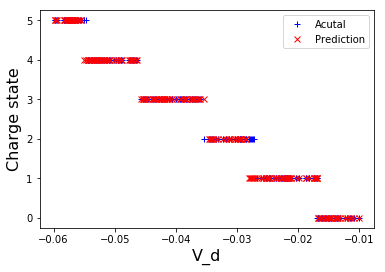

In [4]:
z = tf.argmax(y,1)
z_corr = tf.argmax(y_,1)
output_model = sess.run([z,z_corr],{x:x_test_data,y_: y_test_data})

plt.plot(x_test_data[:,0],output_model[1],'b+')
plt.plot(x_test_data[:,0],output_model[0],'rx')
plt.legend(['Acutal','Prediction'])
plt.xlabel('V_d',fontsize=16)
plt.ylabel('Charge state',fontsize=16)

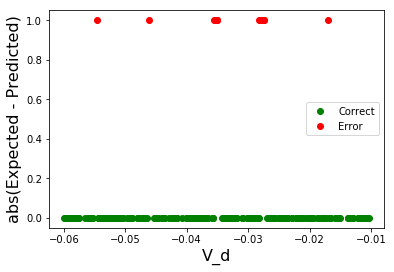

In [4]:
diff = np.abs(output_model[0]-output_model[1])
corr = [i for i, ele in enumerate(diff) if ele == 0]
err = [i for i, ele in enumerate(diff) if ele > 0]
plt.plot(x_test_data[corr,0],diff[corr],'go')
plt.plot(x_test_data[err,0],diff[err],'ro')
plt.xlabel('V_d',fontsize=16)
plt.ylabel('abs(Expected - Predicted)',fontsize=16)
plt.legend(['Correct','Error'])